In [ ]:
%matplotlib inline

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Regression Models
## Live Demo

In [4]:
x_data = np.linspace(-2, 10, 10)
y_data = 2 * x_data + 3
y_noise =np.random.normal(loc = 0, scale = 1, size = len(x_data))
y_data += y_noise

print(x_data)
print(y_data)

[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]
[-2.51882347  2.98026967  3.81020225  7.04548085  9.88627295 11.36425779
 14.18428742 17.87490813 21.74945832 22.65250961]


In [5]:
def plot_model(x, y, y_trial, label):
    plt.scatter(x, y)
    plt.plot(x, y_trial, c = "red", label = label)
    plt.legend()
    plt.show()

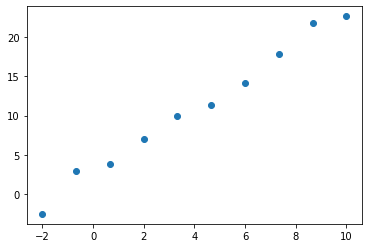

In [6]:
plt.scatter(x_data, y_data)
# plt.plot(x, y, c="r")
plt.show()

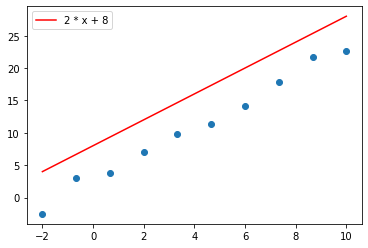

In [8]:
y_trial = 2 * x_data + 8
plot_model(x_data, y_data, y_trial, "2 * x + 8")

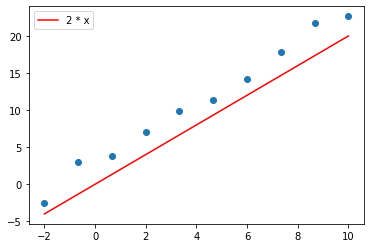

In [10]:
y_trial = 2 * x_data
plot_model(x_data, y_data, y_trial, "2 * x")

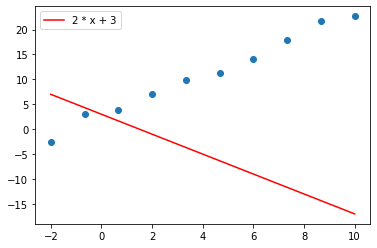

In [11]:
y_trial = -2 * x_data + 3
plot_model(x_data, y_data, y_trial, "2 * x + 3")

In [12]:
def calculate_loss(x_i, y_i, a, b):
    y_tilde = a * x_i + b
    return (y_i - y_tilde)**2


In [13]:
calculate_loss(-2, -0.64745059, 2, 8)

21.598796986491347

In [14]:
def calculate_cost(x, y, a, b):
    assert len(x) == len(y)
    y_tilde = a * x + b
    d = (y - y_tilde) ** 2
    return d.sum() / len(d)

In [15]:
print(calculate_cost(x_data, y_data, 2, 8))
print(calculate_cost(x_data, y_data, 2, 0))
print(calculate_cost(x_data, y_data, -2, 3))
print(calculate_cost(x_data, y_data, 2, 3))

26.78421224784868
9.230329868756007
494.31553887940044
0.8130357609157608


In [26]:
def compute_gradient(x, y, a, b):
    a_grad = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_grad = -2 / len(y) * np.sum(y - (a * x + b))
    return (a_grad, b_grad)

In [27]:
compute_gradient(x_data, y_data, 0, 0)

(-147.37562577962117, -21.805764702613416)

In [28]:
compute_gradient(x_data, y_data, 1, 1)

(-78.04229244628785, -11.805764702613416)

In [35]:
learning_rate = 0.0001

a, b = 0, 0
a_hist, b_hist = [], []
for i in range(100001):    
    a_grad, b_grad = compute_gradient(x_data, y_data, a, b)
    a = a - learning_rate * a_grad
    b = b - learning_rate * b_grad
    if i % 100 == 0:
        a_hist.append(a)
        b_hist.append(b)
print(a, b)

2.0506817602709484 2.7000627909464026


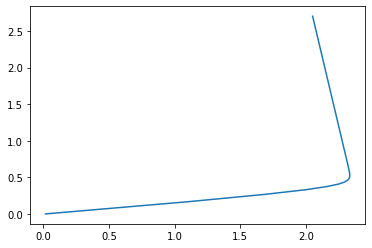

In [36]:
plt.plot(a_hist, b_hist)
plt.show()

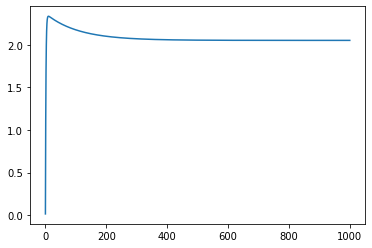

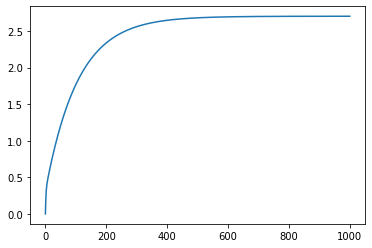

In [37]:
plt.plot(a_hist)
plt.show()
plt.plot(b_hist)
plt.show()

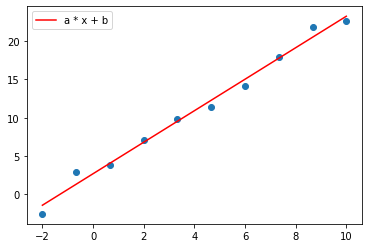

In [40]:
y_trial = a * x_data + b
plot_model(x_data, y_data, y_trial, "a * x + b")

In [41]:
calculate_cost(x_data, y_data, a, b)

0.7659692876243591

In [46]:
model = LinearRegression()

In [47]:
model.fit(x_data.reshape(-1, 1), y_data.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
y_hat = model.predict(x_data.reshape(-1, 1))

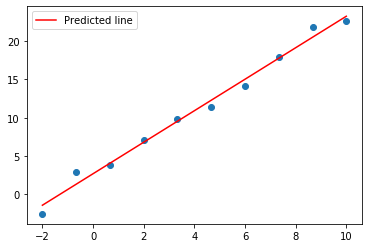

In [56]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y_hat, color = "red", label = "Predicted line")
plt.legend()
plt.show()

In [57]:
model.coef_

array([[2.05065569]])

In [58]:
model.intercept_

array([2.70025958])

In [61]:
a = model.coef_[0]
b = model.intercept_[0]

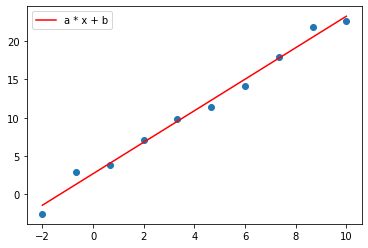

In [62]:
y_trial = a * x_data + b
plot_model(x_data, y_data, y_hat, "a * x + b")

In [63]:
model.score(x_data.reshape(-1, 1), y_data)

0.987733122005081